<a href="https://colab.research.google.com/github/Elygledson/Deep-Learning-with-PyTorch/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating fake data

In [32]:
import torch
import torch.nn as nn

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

# Neural Network Model

In [33]:
class Net(nn.Module):
    def __init__(self, n_inputs,h, outputs_dim):
        super(Net, self).__init__()
        self.linear = nn.Linear(n_inputs, h)
        self.linear2 = nn.Linear(h, outputs_dim)

    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        yhat = torch.sigmoid(self.linear2(yhat))
        return yhat

model = Net(1,2,1)

In [34]:
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Text(0.5, 1.0, 'cross entropy loss')

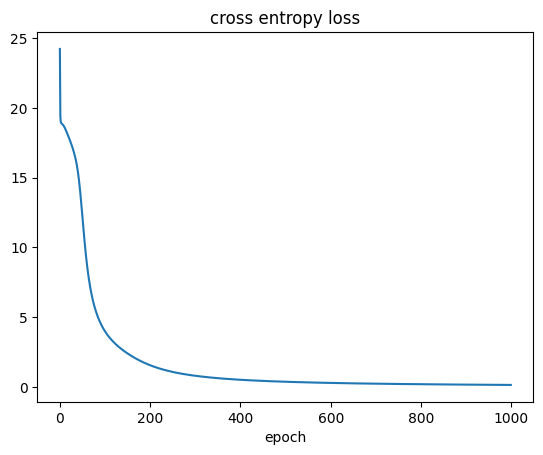

In [35]:
import matplotlib.pyplot as plt

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss
            total+=loss.item()
        cost.append(total)
    return cost

cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')